# Speed-to-Fly: Classic MacCready

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import warnings
import seaborn as sns

In [2]:
# import the glidepy library
import glidepy as gp

In [3]:
warnings.simplefilter('ignore', np.RankWarning)
%matplotlib notebook
sns.set()

In [4]:
kmh_to_knots = 0.539957
ms_to_knots = 1.94384
knots_to_kmh = 1.852
nm_to_feet = 6076.12
nm_to_sm = 1.15078
kg_to_lbs = 2.20462

In [5]:
speeds = [75, 80, 90, 105, 127.5, 143.0, 155.0, 200.0]
sink_rates = [-0.52, -0.49, -0.55, -0.6, -0.8, -1.0, -1.2, -2.4]

ref_weight = 320 * kg_to_lbs
weight_dry = 800
print("Reference weight in lbs: %d" % ref_weight)
weight_wet = 1102

Reference weight in lbs: 705


In [6]:
asw27 = gp.Glider(speeds, sink_rates, ref_weight, weight_dry)

asw27_wet = gp.Glider(speeds, sink_rates, ref_weight, weight_wet)

#### What is the optimal speed to fly (dry) if there is  5 knot climb ahead?
Assumes "Classic" conditions.

In [7]:
asw27.speed_to_fly(5)   # speed to fly in knots

96.715555836512749

### Plotting Speed-to-Fly 

We can use this feature to plot a graph of optimal speeds for a range of MC settings

<IPython.core.display.Javascript object>


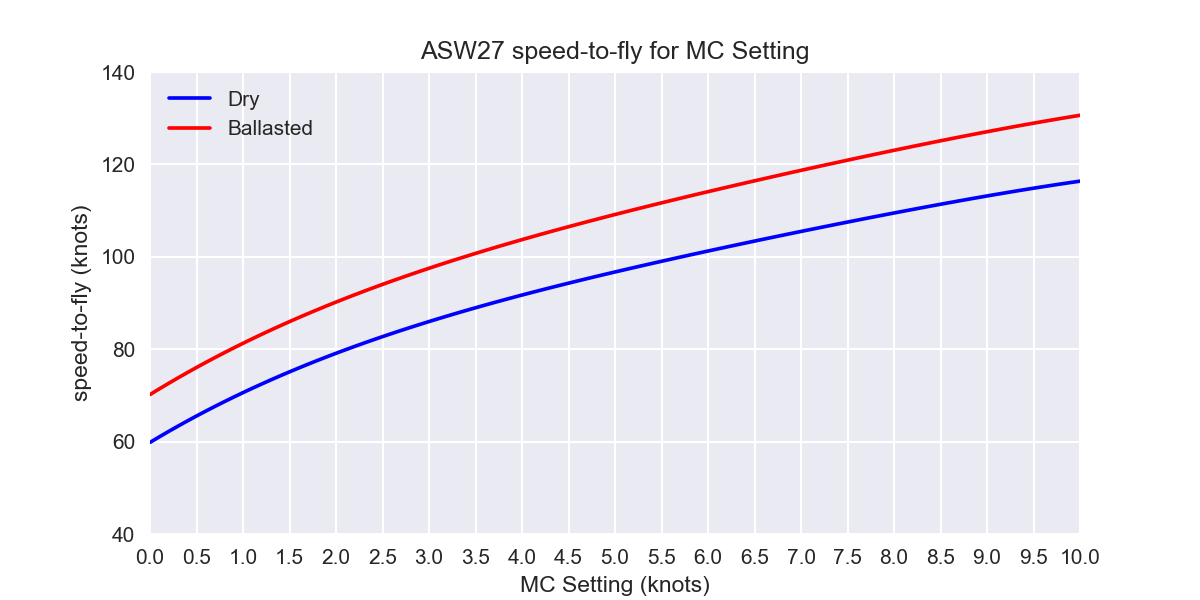

In [8]:
mc_range = np.arange(0, 10.5, 0.1)
speeds_graph = [asw27.speed_to_fly(speed) for speed in mc_range]
speeds_graph_wet = [asw27_wet.speed_to_fly(speed) for speed in mc_range]

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(mc_range, speeds_graph, color="blue")
ax.plot(mc_range, speeds_graph_wet, color="red")
ax.set(title='ASW27 speed-to-fly for MC Setting',
       ylabel='speed-to-fly (knots)',
       xlabel='MC Setting (knots)',
       xticks=np.arange(0, 10.5, 0.5), 
       ylim=(40, 140),
       xlim=(0, 10))
ax.legend(['Dry', 'Ballasted'], loc=2)
plt.show()

When you say "I am flying at MC 3", it means you're going at ~83 knots (dry).

### The Average XC Speed
The average speed includes both the cruise and climb phases of flight.

In [9]:
# calc avg speed at 60 knots for a MC 5 climb ahead
asw27.calc_avg_speed(speed=60, climb_rate=5)

48.03117272683852

What's the optimal avg speed for a 5 knot climb ahead?

In [10]:
best_speed = asw27.speed_to_fly(climb_rate=5)
print("Best STF in knots: %f" % best_speed)
avg_speed = asw27.calc_avg_speed(speed=best_speed, climb_rate=5)/kmh_to_knots
print("Avg XC speed in km/h: %f" % avg_speed)

Best STF in knots: 96.715556
Avg XC speed in km/h: 111.077785


Usually we don't fly that fast. Lets assume we fly at MC 3.

In [11]:
best_speed = asw27.speed_to_fly(climb_rate=3)
print("Best STF in knots: %f" % best_speed)
avg_speed = asw27.calc_avg_speed(speed=best_speed, climb_rate=5)/kmh_to_knots
print("Avg XC speed in km/h: %f" % avg_speed)

Best STF in knots: 85.983192
Avg XC speed in km/h: 109.264652


#### We now fly at a more reasonable (for a dry glider) 85 knots with only a slight reduction (~2 Km/h) in avg speed.

## Plotting the Average XC Speed

<IPython.core.display.Javascript object>


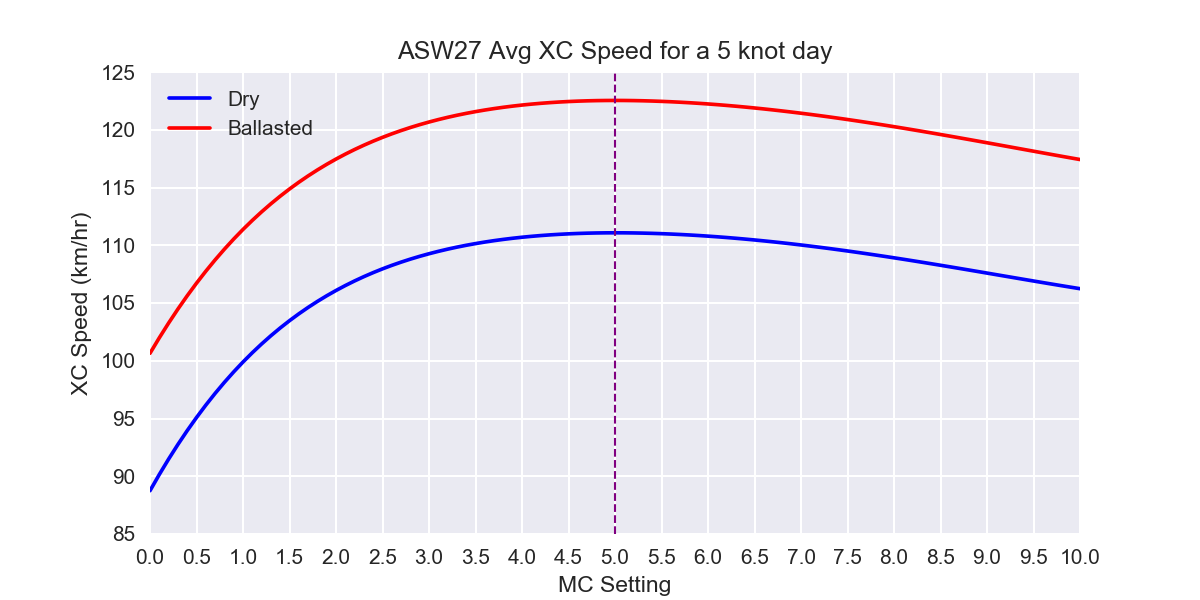

In [12]:
climb_rate = 5
mc_range = np.arange(0, 10.5, 0.1)
avg_speeds_graph = [asw27.calc_avg_speed(asw27.speed_to_fly(mc), climb_rate)/kmh_to_knots for mc in mc_range]
avg_speeds_graph_wet = [asw27_wet.calc_avg_speed(asw27_wet.speed_to_fly(mc), climb_rate)/kmh_to_knots for mc in mc_range]

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(mc_range, avg_speeds_graph, color="blue")
ax.plot(mc_range, avg_speeds_graph_wet, color="red")
ax.set(title='ASW27 Avg XC Speed for a 5 knot day',
       ylabel='XC Speed (km/hr)',
       xlabel='MC Setting',
       xticks=np.arange(0, 10.5, 0.5), 
       ylim=(85, 125),
       xlim=(0, 10.0))
ax.legend(['Dry', 'Ballasted'], loc=2)
ax.axvline(x=5.0, color='purple', linestyle='--', linewidth=1)
plt.show()

The optimal MC setting for the above plot is 5, the same as the expected climb rate and is marked by the vertical line. Notice how modest deviations in the MC setting from the optimal value have a small impact on XC speed. Going too fast reduces the XC speed less severely than flying too slow. As we will see, the main impact of flying too fast is dramatically reduced range. 
#### Flying too slow has a significant impact in XC speed  even though it does improve range.

We will revisit this topic in more depth in a later notebook.

Also, note that the plot is normalized for the MC setting for both gliders, although the underlying optimal speed is different for each. Lets plot the above again but directly for speeds.

<IPython.core.display.Javascript object>


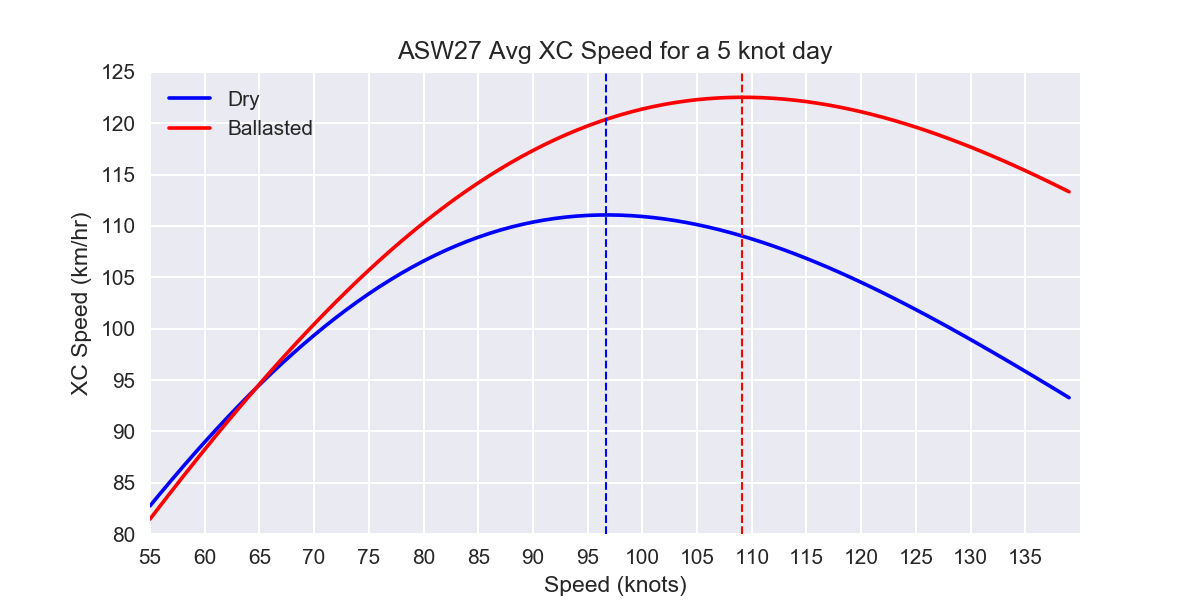

In [13]:
climb_rate = 5
speed_range = np.arange(55, 140, 1)
avg_speeds_graph = [asw27.calc_avg_speed(speed, climb_rate)/kmh_to_knots for speed in speed_range]
avg_speeds_graph_wet = [asw27_wet.calc_avg_speed(speed, climb_rate)/kmh_to_knots for speed in speed_range]

best_speed_dry = asw27.speed_to_fly(climb_rate)
best_speed_wet = asw27_wet.speed_to_fly(climb_rate)

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(speed_range, avg_speeds_graph, color="blue")
ax.plot(speed_range, avg_speeds_graph_wet, color="red")
ax.set(title='ASW27 Avg XC Speed for a 5 knot day',
       ylabel='XC Speed (km/hr)',
       xlabel='Speed (knots)',
       xticks=np.arange(55, 140, 5), 
       ylim=(80, 125),
       xlim=(55, 140))
ax.legend(['Dry', 'Ballasted'], loc=2)
ax.axvline(x=best_speed_dry, color='blue', linestyle='--', linewidth=1)
ax.axvline(x=best_speed_wet, color='red', linestyle='--', linewidth=1)
plt.show()

Here the dashed lines are the best STFs for the dry and wet gliders.